# Correlation by chance

In this notebook, we reproduce the [spurious correlation](https://tylervigen.com/spurious-correlations) featured by Tyler Vigen between:

- The yearly number of worldwide commercial space launches (source: [Federal Aviation Administration](https://www.census.gov/compendia/statab/2012/tables/12s0822.xls))
- The yearly number of sociology doctorates awarded in the US (source: [National Science Foundation](https://www.nsf.gov/statistics/infbrief/nsf11305/))

These two timeseries contain 13 points (between years 1997 and 2009).

In [1]:
import numpy as np
from scipy.stats import pearsonr

import matplotlib.pyplot as plt

We first construct the two timeseries and compute their Pearson correlation coefficient along with the corresponding p-value.

In [5]:
ts_faa = np.array([54, 46, 42, 50, 43, 41, 46, 39, 37, 45, 45, 41, 54])
ts_nsf = np.array([601, 579, 572, 617, 566, 547, 597, 580, 536, 579, 576, 601, 664])

corr, pval = pearsonr(ts_faa, ts_nsf)

print(f"Correlation = {corr * 100:.2f}% | p-value = {pval:.5f}")

Correlation = 78.91% | p-value = 0.00134


We then sample one million random timeseries of the same length as `ts_faa` and `ts_nsf`. Each point is i.i.d according to a normal distribution with the mean and standard deviation of `ts_faa`.

We then compute the correlation coefficient of each random timeseries with `ts_faa` and compute the fraction of those that are higher or equal to the correlation coefficient between `ts_nsf` and `ts_faa`. This should match almost exactly the p-value computed using the statistical test (only 5 digits are shown here).

In [6]:
num_trials = 1_000_000

data = np.mean(ts_faa) + np.std(ts_faa) * np.random.randn(num_trials, ts_faa.shape[0])

corrs = np.zeros(num_trials)
for i in range(num_trials):
    corrs[i] = pearsonr(data[i,:], ts_faa)[0]

pval_emp = corrs[np.abs(corrs) >= corr].shape[0] / corrs.shape[0] 

print(f"Empirical p-value {pval_emp:.5f}")

Empirical p-value 0.00134


We then plot a small subset of the random timeseries along with `ts_faa` and `ts_nsf`. We also plot the histogram of the correlation coefficients computed in the previous step. The vertical green line shows the correlation between `ts_faa` and `ts_nsf`. The fraction of samples that lie beyond this line represents only 0.134% of the total samples, in agreement with the p-value obtained before.

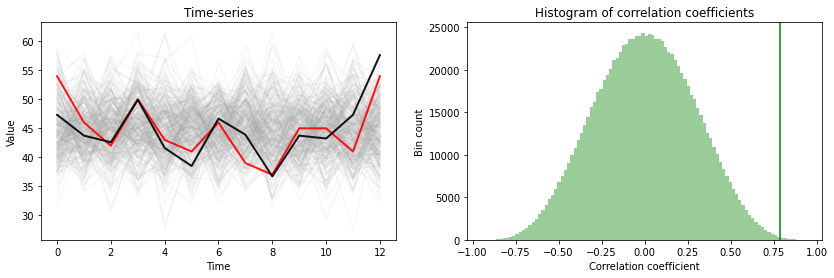

In [7]:
num_trials_to_show = 250

idx = np.random.choice(np.arange(num_trials), size=num_trials_to_show, replace=False)

plt.figure(figsize=(14, 4))

plt.subplot(1, 2, 1)
plt.plot(data[idx, :].T, alpha=0.1, color="#AAAAAA")
plt.plot(ts_faa, alpha=0.9, color="r", linewidth=2)

# re-scale ts2 to match ts1 mean and standard deviation
ts_nsf_ = (ts_nsf - np.mean(ts_nsf)) / np.std(ts_nsf) * np.std(ts_faa) + np.mean(ts_faa)
plt.plot(ts_nsf_, alpha=0.9, color="k", linewidth=2)

plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Time-series")

plt.subplot(1, 2, 2)
plt.hist(corrs, 100, color="g", alpha=0.4)
plt.axvline(color="g", x=corr)

plt.xlabel("Correlation coefficient")
plt.ylabel("Bin count")
_ = plt.title("Histogram of correlation coefficients")